## Import libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import zipfile

### Download the results file from the TSE Dados Abertos

Uncomment when running the code for the first time, then you can comment again

In [2]:
# url_download = 'https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_secao/votacao_secao_2022_BR.zip'
# opener = urllib.request.build_opener()
# opener.addheaders = [('User-agent', 'Mozilla/5.0')]
# urllib.request.install_opener(opener)
# urllib.request.urlretrieve(url_download, f"CSV/votacao_secao_2022_BR.zip")

If you prefer you can download the files manually: The full list of files can be found [here](https://dadosabertos.tse.jus.br/dataset/resultados-2022)!

### Unzip the downloaded file


Uncomment when running the code for the first time, then you can comment again

In [3]:
# with zipfile.ZipFile(f"CSV/votacao_secao_2022_BR.zip", 'r') as zip_ref:
#     zip_ref.extractall("CSV/")

### Read the extracted CSV

In [4]:
df = pd.read_csv("CSV/votacao_secao_2022_BR.csv", encoding="Latin 1", sep=";", usecols=['NR_TURNO','SG_UF','NM_MUNICIPIO','NR_ZONA','NR_SECAO','DS_CARGO','NM_VOTAVEL','QT_VOTOS'])

In [5]:
# Quality check, total votes for Lula in Bahia
# df[(df['SG_UF']=='BA')&(df['NM_VOTAVEL']=='LUIZ INÁCIO LULA DA SILVA')&(df['DS_CARGO']=='PRESIDENTE')&(df['NR_TURNO']==2)]['QT_VOTOS'].sum()

### Filter by 2o turno and exclude null and branco votes, 

In [6]:
df_2oturno = df[(df['NR_TURNO']==2)].copy()

## RUN PIVOT

In [7]:
results = df_2oturno[['SG_UF','NM_MUNICIPIO','NM_VOTAVEL','QT_VOTOS']].groupby(by=['SG_UF','NM_MUNICIPIO','NM_VOTAVEL']).sum("QT_VOTOS")
pivot = results.unstack(level='NM_VOTAVEL')
pivot

QT_VOTOS                            \
NM_VOTAVEL         JAIR MESSIAS BOLSONARO LUIZ INÁCIO LULA DA SILVA   
SG_UF NM_MUNICIPIO                                                    
AC    ACRELÂNDIA                   5317.0                    1460.0   
      ASSIS BRASIL                 2717.0                    1895.0   
      BRASILÉIA                    9593.0                    3958.0   
      BUJARI                       4693.0                    1958.0   
      CAPIXABA                     3963.0                    1497.0   
...                                   ...                       ...   
ZZ    WELLINGTON                    164.0                     389.0   
      WINDHOEK                       31.0                       4.0   
      XANGAI                         62.0                     125.0   
      ZAGREB                         15.0                      26.0   
      ZURIQUE                      2762.0                    3189.0   

                                          
NM_VOTAVEL         VOTO BRANCO VOTO NULO  
SG_UF NM_MUNICIPIO                        
AC    ACRELÂNDIA          51.0      92.0  
      ASSIS BRASIL        30.0      67.0  
      BRASILÉIA           99.0     145.0  
      BUJARI              88.0     107.0  
      CAPIXABA            34.0      56.0  
...                        ...       ...  
ZZ    WELLINGTON           7.0       9.0  
      WINDHOEK             NaN       1.0  
      XANGAI               3.0       4.0  
      ZAGREB               NaN       1.0  
      ZURIQUE            125.0     149.0  

[5710 rows x 4 columns]

In [8]:
results_sessao = df_2oturno[['SG_UF','NM_MUNICIPIO','NR_ZONA','NR_SECAO','NM_VOTAVEL','QT_VOTOS']].groupby(by=['SG_UF','NM_MUNICIPIO','NR_ZONA','NR_SECAO','NM_VOTAVEL']).sum("QT_VOTOS")
pivot_sessao = results_sessao.unstack(level='NM_VOTAVEL')
pivot_sessao

QT_VOTOS  \
NM_VOTAVEL                          JAIR MESSIAS BOLSONARO   
SG_UF NM_MUNICIPIO NR_ZONA NR_SECAO                          
AC    ACRELÂNDIA   8       8                         111.0   
                           9                         105.0   
                           64                        123.0   
                           72                        116.0   
                           77                        122.0   
...                                                    ...   
ZZ    ZURIQUE      1       356                       130.0   
                           357                       148.0   
                           358                       129.0   
                           359                       144.0   
                           360                        59.0   

                                                                           \
NM_VOTAVEL                          LUIZ INÁCIO LULA DA SILVA VOTO BRANCO   
SG_UF NM_MUNICIPIO NR_ZONA NR_SECAO                                         
AC    ACRELÂNDIA   8       8                             41.0         1.0   
                           9                             28.0         2.0   
                           64                            41.0         1.0   
                           72                            42.0         NaN   
                           77                            31.0         4.0   
...                                                       ...         ...   
ZZ    ZURIQUE      1       356                          216.0         6.0   
                           357                          191.0         6.0   
                           358                          139.0         5.0   
                           359                          192.0         9.0   
                           360                           62.0         4.0   

                                               
NM_VOTAVEL                          VOTO NULO  
SG_UF NM_MUNICIPIO NR_ZONA NR_SECAO            
AC    ACRELÂNDIA   8       8              NaN  
                           9              NaN  
                           64             5.0  
                           72             3.0  
                           77             5.0  
...                                       ...  
ZZ    ZURIQUE      1       356            9.0  
                           357            8.0  
                           358            3.0  
                           359            3.0  
                           360            2.0  

[472028 rows x 4 columns]

### Check specific Sessao and Zona

In [ ]:
zona = 128
secao = 492
df[(df['NR_ZONA']==zona)&(df['NR_SECAO']==secao)&(df['NR_TURNO']==2)][['NM_VOTAVEL','QT_VOTOS']].groupby(by='NM_VOTAVEL').sum("QT_VOTOS")

,QT_VOTOS
NM_VOTAVEL,
LUIZ INÁCIO LULA DA SILVA,37
VOTO NULO,2


### EDA

In [11]:
pivot_sessao['difference'] = pivot_sessao['QT_VOTOS', 'LUIZ INÁCIO LULA DA SILVA']-pivot_sessao['QT_VOTOS', 'JAIR MESSIAS BOLSONARO']
pivot_sessao

QT_VOTOS  \
NM_VOTAVEL                          JAIR MESSIAS BOLSONARO   
SG_UF NM_MUNICIPIO NR_ZONA NR_SECAO                          
AC    ACRELÂNDIA   8       8                         111.0   
                           9                         105.0   
                           64                        123.0   
                           72                        116.0   
                           77                        122.0   
...                                                    ...   
ZZ    ZURIQUE      1       356                       130.0   
                           357                       148.0   
                           358                       129.0   
                           359                       144.0   
                           360                        59.0   

                                                                           \
NM_VOTAVEL                          LUIZ INÁCIO LULA DA SILVA VOTO BRANCO   
SG_UF NM_MUNICIPIO NR_ZONA NR_SECAO                                         
AC    ACRELÂNDIA   8       8                             41.0         1.0   
                           9                             28.0         2.0   
                           64                            41.0         1.0   
                           72                            42.0         NaN   
                           77                            31.0         4.0   
...                                                       ...         ...   
ZZ    ZURIQUE      1       356                          216.0         6.0   
                           357                          191.0         6.0   
                           358                          139.0         5.0   
                           359                          192.0         9.0   
                           360                           62.0         4.0   

                                              difference  
NM_VOTAVEL                          VOTO NULO             
SG_UF NM_MUNICIPIO NR_ZONA NR_SECAO                       
AC    ACRELÂNDIA   8       8              NaN      -70.0  
                           9              NaN      -77.0  
                           64             5.0      -82.0  
                           72             3.0      -74.0  
                           77             5.0      -91.0  
...                                       ...        ...  
ZZ    ZURIQUE      1       356            9.0       86.0  
                           357            8.0       43.0  
                           358            3.0       10.0  
                           359            3.0       48.0  
                           360            2.0        3.0  

[472028 rows x 5 columns]

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00,
        3.0000e+00, 3.0000e+00, 1.1000e+01, 1.3000e+01, 1.5000e+01,
        2.6000e+01, 5.4000e+01, 4.9000e+01, 1.1500e+02, 2.1100e+02,
        3.5200e+02, 5.9800e+02, 8.7200e+02, 1.3420e+03, 1.8460e+03,
        2.4560e+03, 3.2310e+03, 4.3200e+03, 5.5600e+03, 7.2600e+03,
        9.5700e+03, 1.1939e+04, 1.4212e+04, 1.6771e+04, 1.8986e+04,
        2.0146e+04, 2.1641e+04, 2.2227e+04, 2.2307e+04, 2.1786e+04,
        2.0683e+04, 1.9738e+04, 1.8739e+04, 1.7824e+04, 1.7000e+04,
        1.6145e+04, 1.5441e+04, 1.4765e+04, 1.3712e+04, 1.2994e+04,
        1.2336e+04, 1.1453e+04, 1.0643e+04, 1.0240e+04, 9.1360e+03,
        8.5620e+03, 8.1250e+03, 6.1760e+03, 5.1990e+03, 4.0170e+03,
        3.3020e+03, 2.3850e+03, 1.6540e+03, 1.16

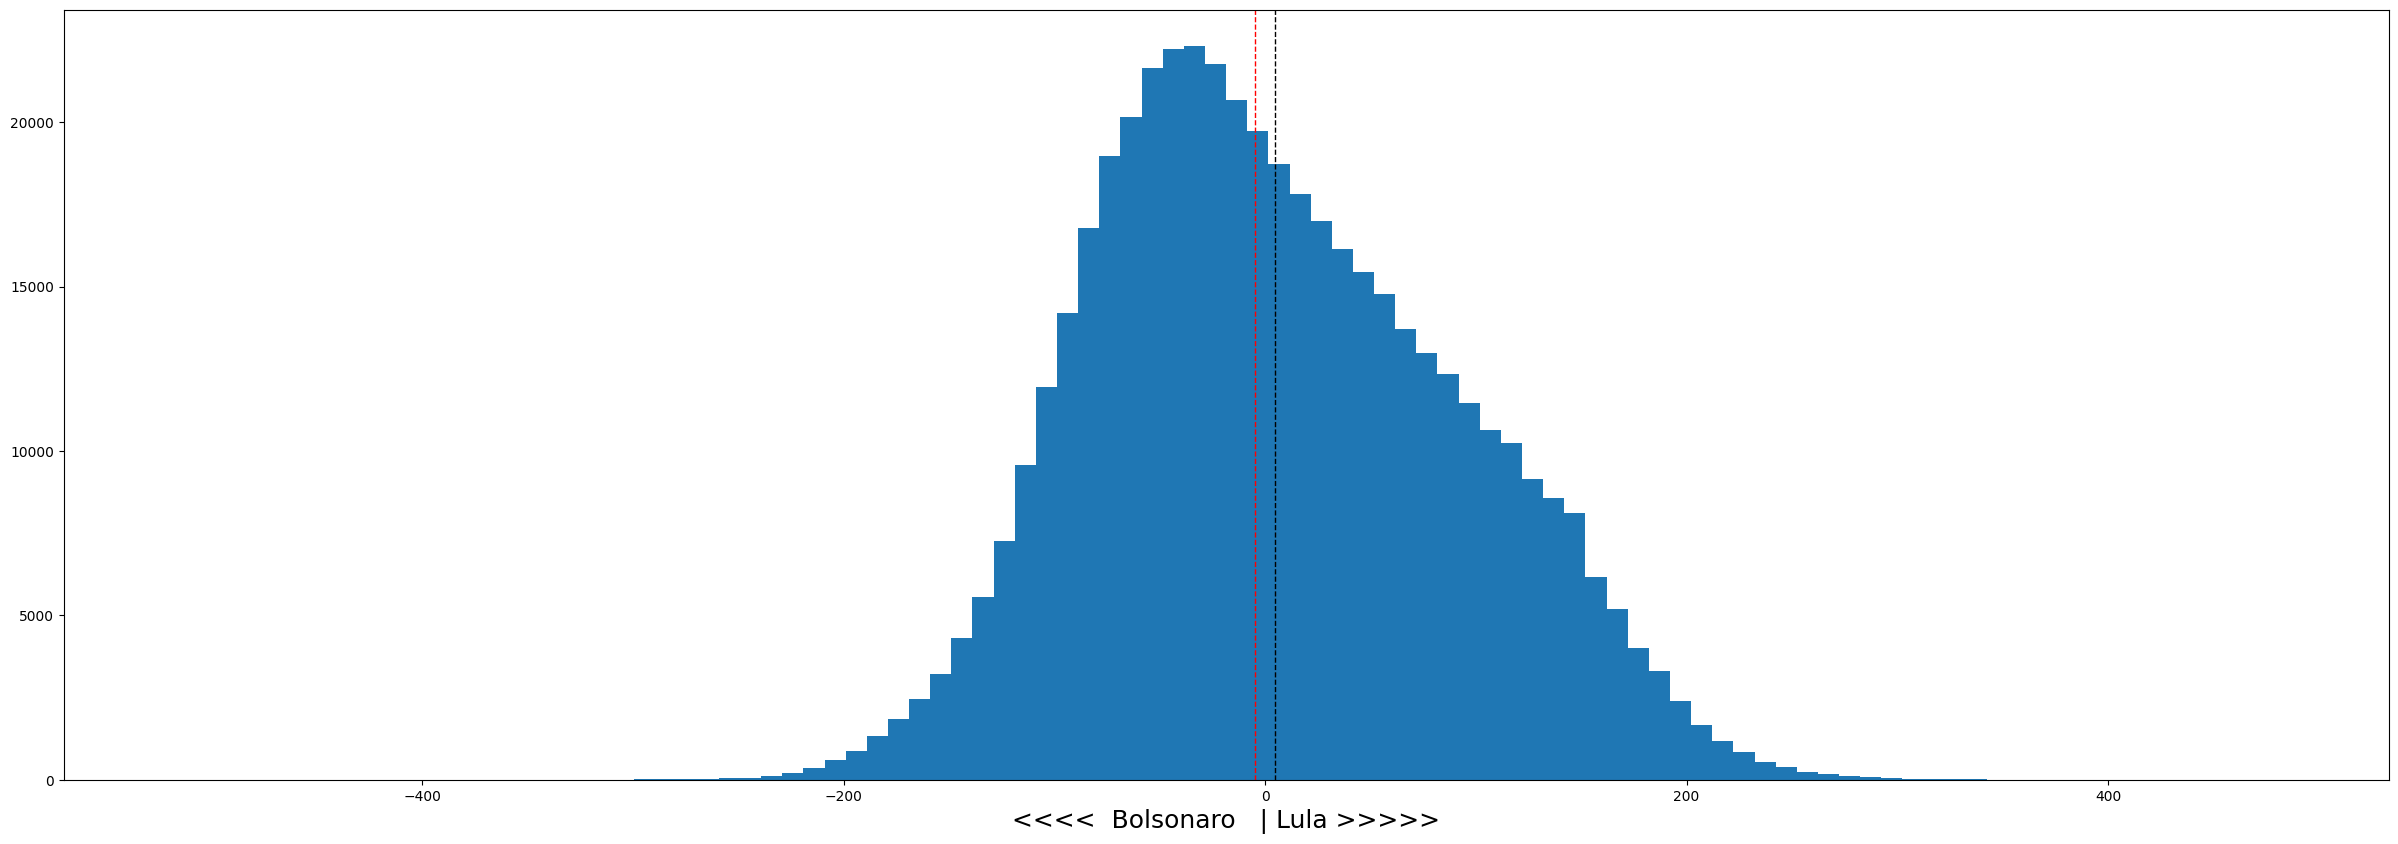

In [46]:

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.xlabel('<<<<  Bolsonaro   | Lula >>>>>', fontsize=18)
plt.axvline(pivot_sessao['difference'].mean(), color='k', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(pivot_sessao['difference'].median(), color='red', linestyle='dashed', linewidth=1, label='Mediana')
plt.hist(pivot_sessao['difference'],bins=100)